In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

import missingno as msno

In [363]:
# WINDOW
t_iden = pd.read_csv(r"C:\Users\EPOPCON\Desktop\Kaggle\train_identity.csv")
t_tran = pd.read_csv(r"C:\Users\EPOPCON\Desktop\Kaggle\train_transaction.csv")

In [504]:
print (t_iden.columns)
print (t_tran.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')
Index(['TransactionID', 'Target', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)


In [505]:
t_tran.head()

,TransactionID,Target,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


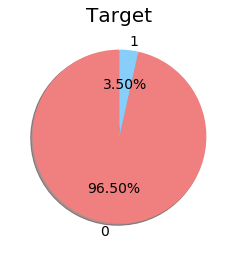

In [506]:
t_tran = t_tran.rename(columns = {'isFraud':'Target'})
Target = t_tran['Target'].value_counts()
Target_names = Target.index.tolist()
group_colors=['lightcoral','lightskyblue']

plt.pie(Target,labels = Target_names, colors = group_colors, shadow = True,
        startangle = 90,textprops = {'fontsize': 14}, autopct = '%1.2f%%')
plt.title('Target', fontsize=20)
plt.show()

In [507]:
df = pd.merge(t_iden,t_tran, on = 'TransactionID')

In [508]:
df = df.rename(columns = {'isFraud':'Target'})

In [509]:
df = df.set_index('TransactionID')

In [510]:
df.shape

(144233, 433)

In [511]:
ft = df.columns

In [512]:
ft[0:38]

Index(['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'],
      dtype='object')

In [513]:
id_1 = df[ft[0:19]]

In [514]:
id_2 = df[ft[19:38]]

C:\Users\EPOPCON\Anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "
C:\Users\EPOPCON\Anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


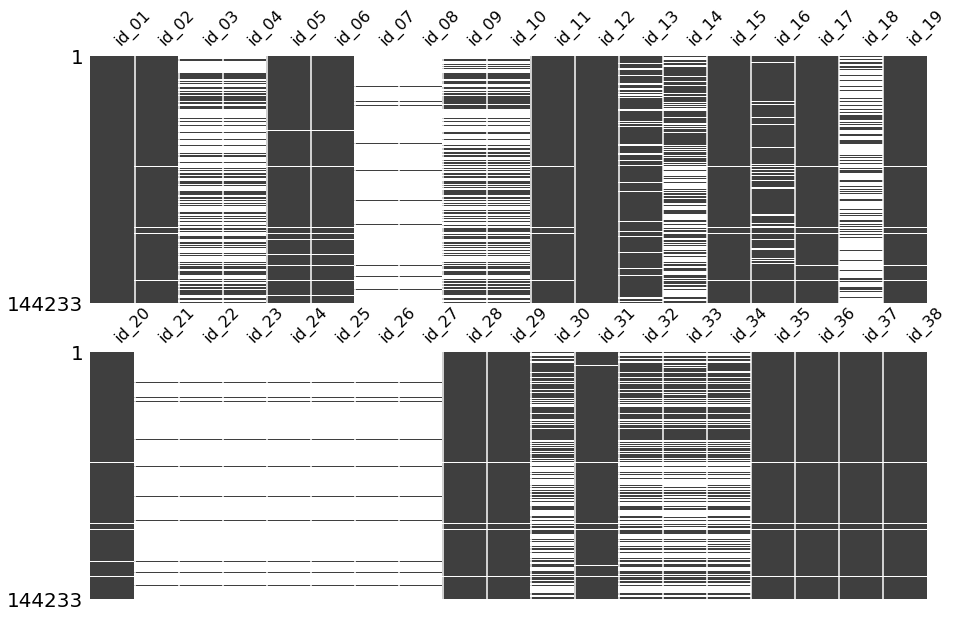

In [515]:
fig,(ax1,ax2) = plt.subplots(nrows = 2)
fig.set_size_inches(15, 10)
msno.matrix(id_1, ax = ax1)
msno.matrix(id_2, ax = ax2)

plt.show()

In [516]:
#id_07, id_08, id_21, id_22, id_23, id_24, id_25, id_26 id_27 결측치 너무 많아 제거

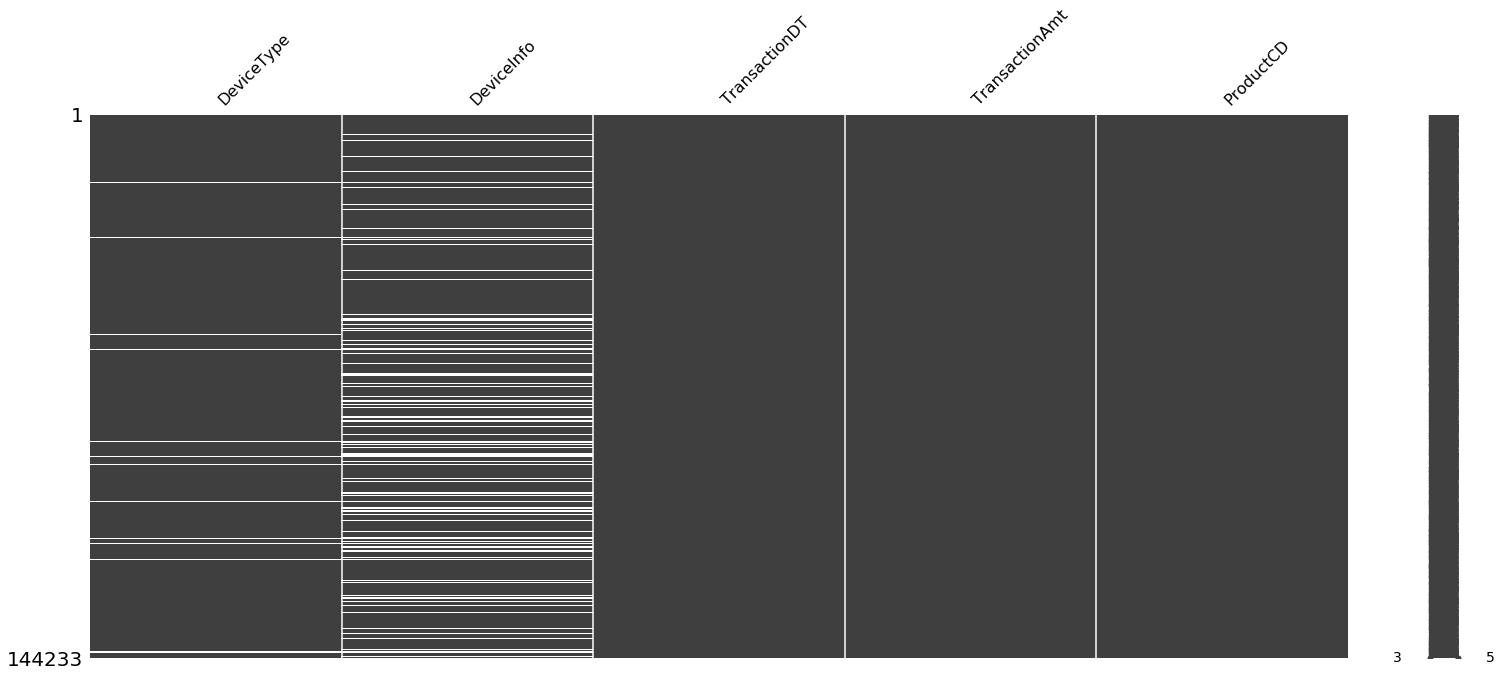

In [517]:
etc_1 = df[ft[38:44]].drop('Target', axis = 1)
msno.matrix(etc_1)

plt.show()

In [518]:
card = df[ft[44:50]]

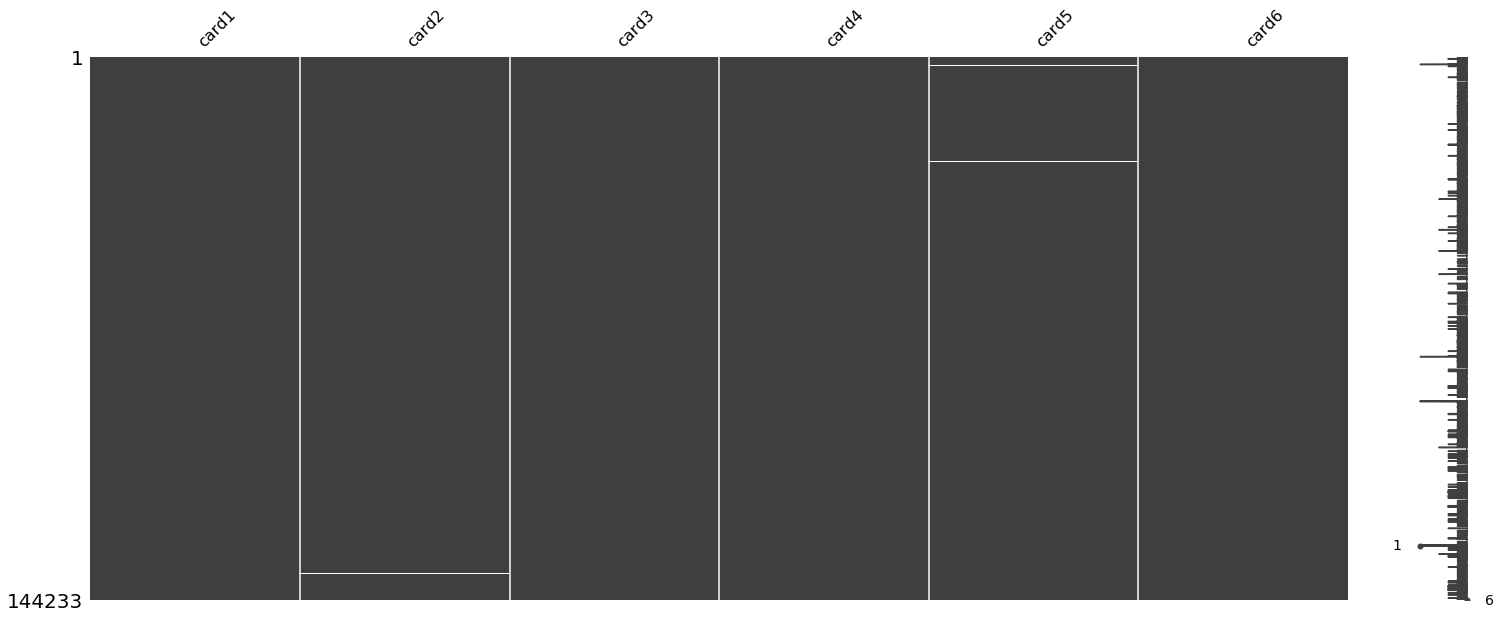

In [519]:
msno.matrix(card)

plt.show()

In [520]:
etc_2 = df[ft[50:56]]

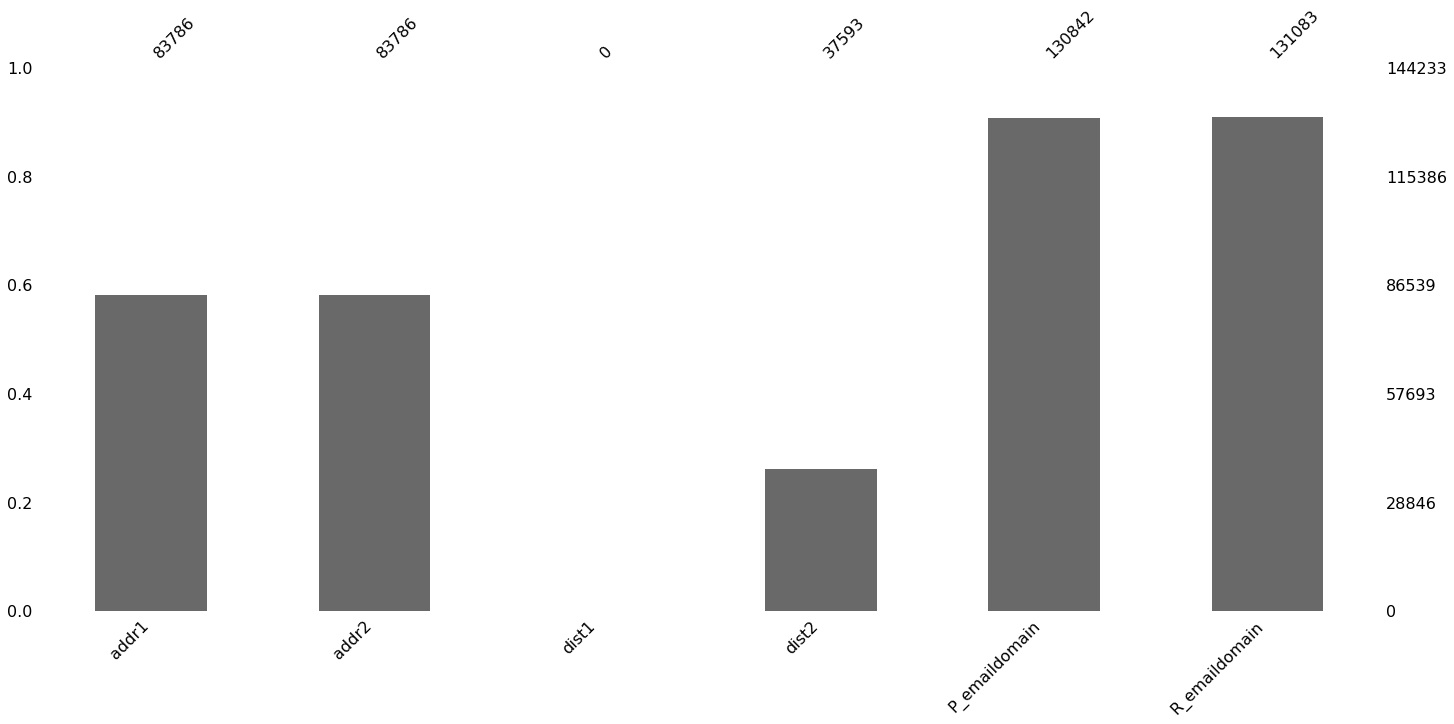

In [521]:
msno.bar(etc_2)

plt.show()

In [522]:
# dist1,dist2 결측치 너무 많아 제거

In [523]:
c = df[ft[56:70]]

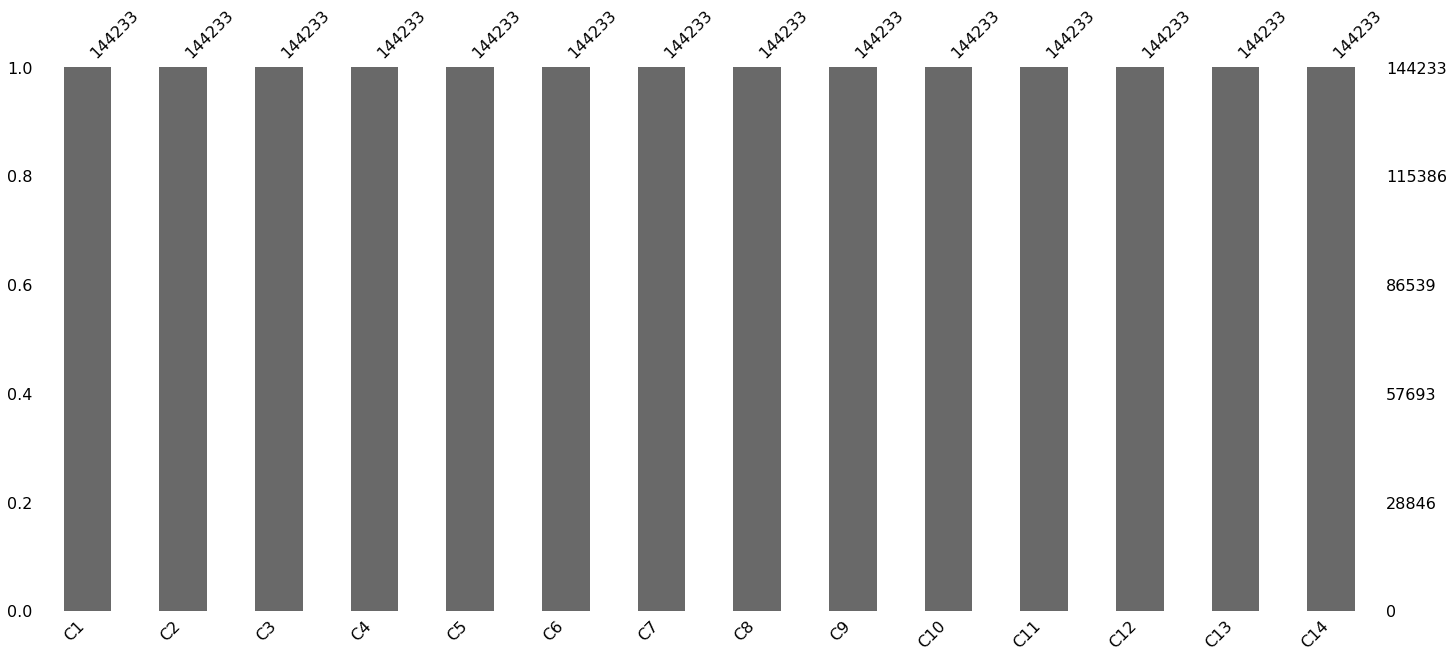

In [524]:
msno.bar(c)

plt.show()

In [525]:
d = df[ft[70:85]]

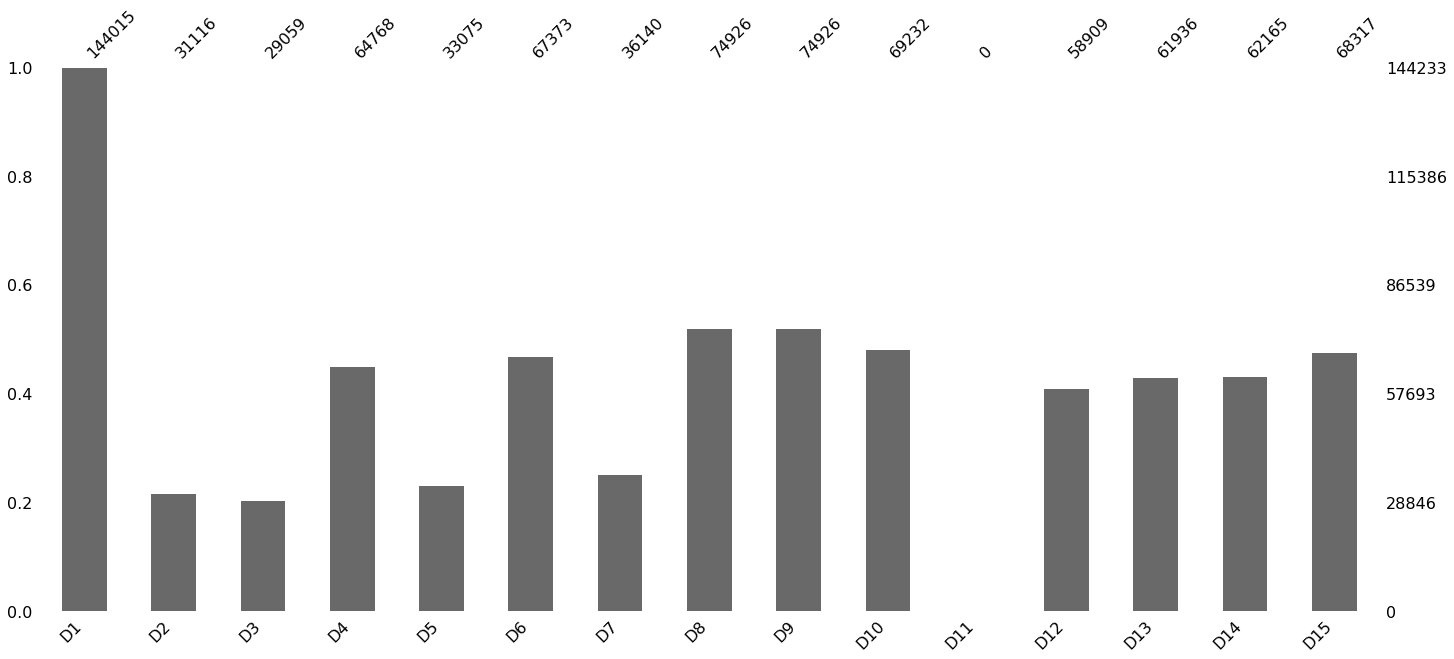

In [526]:
msno.bar(d)

plt.show()

In [527]:
# ... 좀 봐야할듯

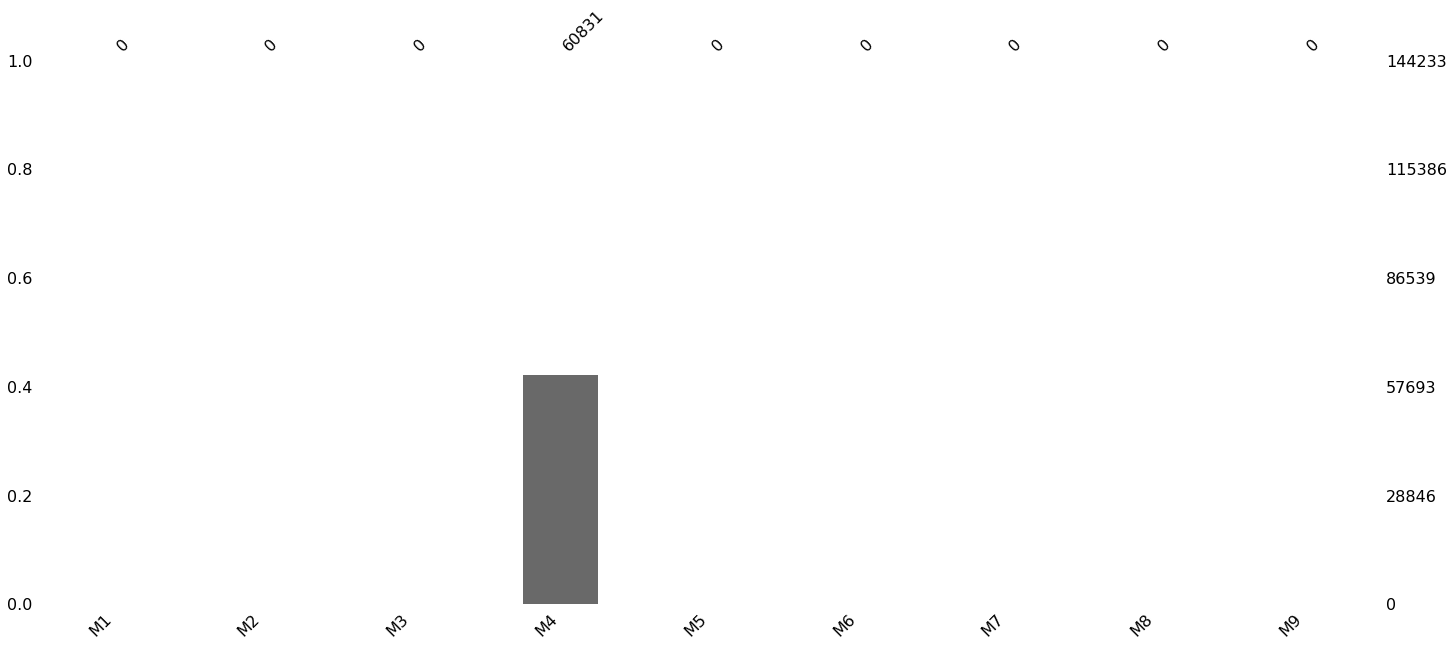

In [528]:
m = df[ft[85:94]]
msno.bar(m)

plt.show()

In [529]:
# m4 뺴고 다 제거

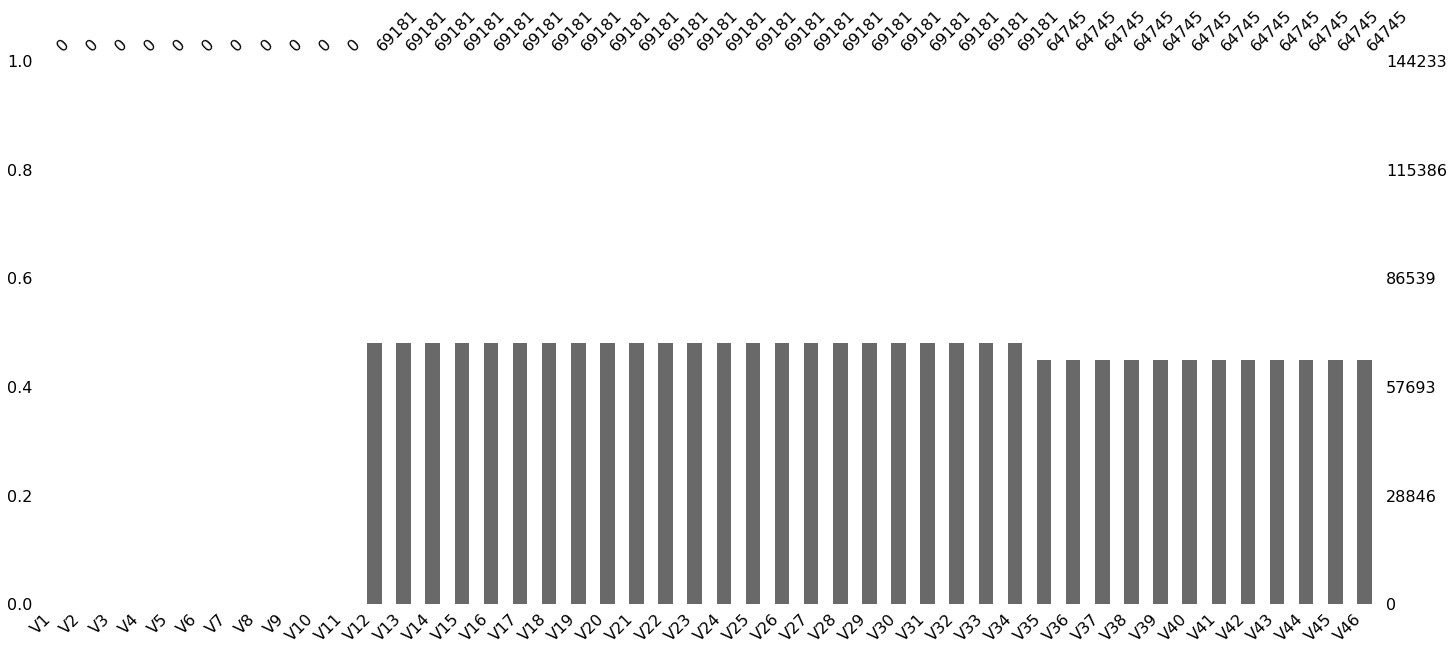

In [530]:
v_01 = df[ft[94:140]]
msno.bar(v_01)

plt.show()

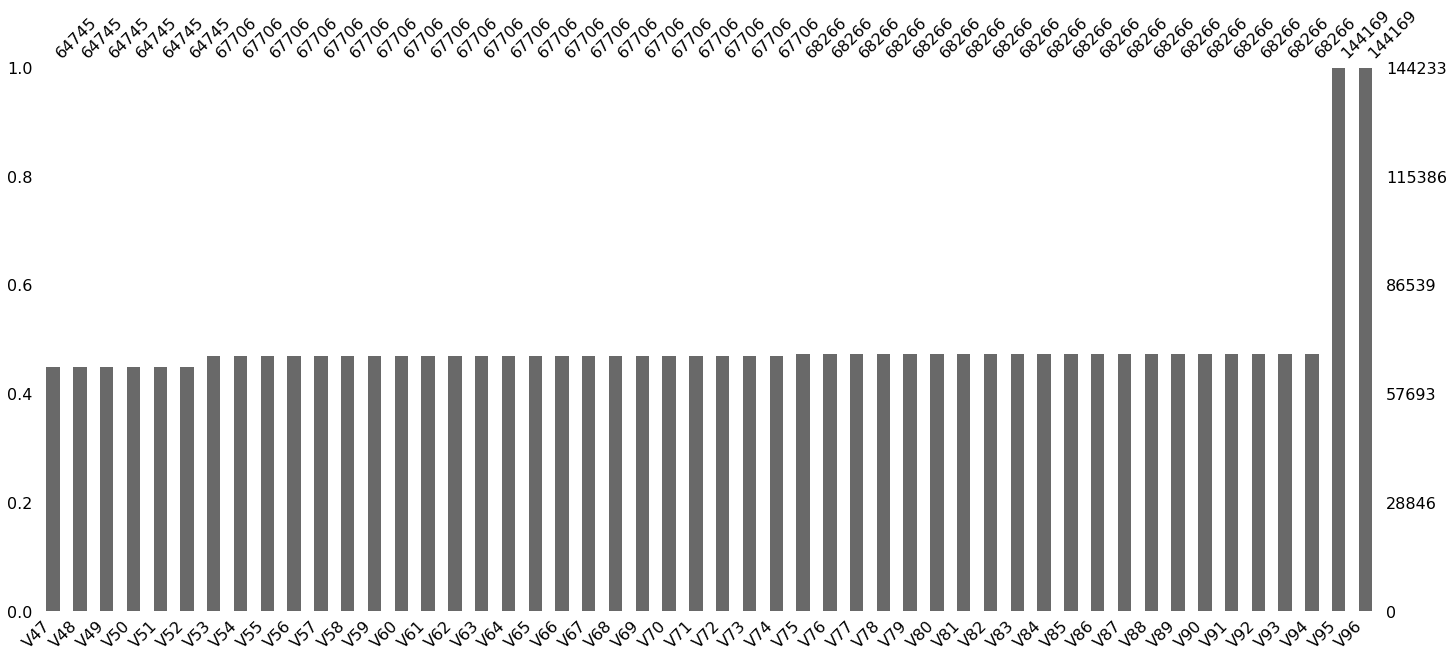

In [531]:
v_02 = df[ft[140:190]]
msno.bar(v_02)

plt.show()

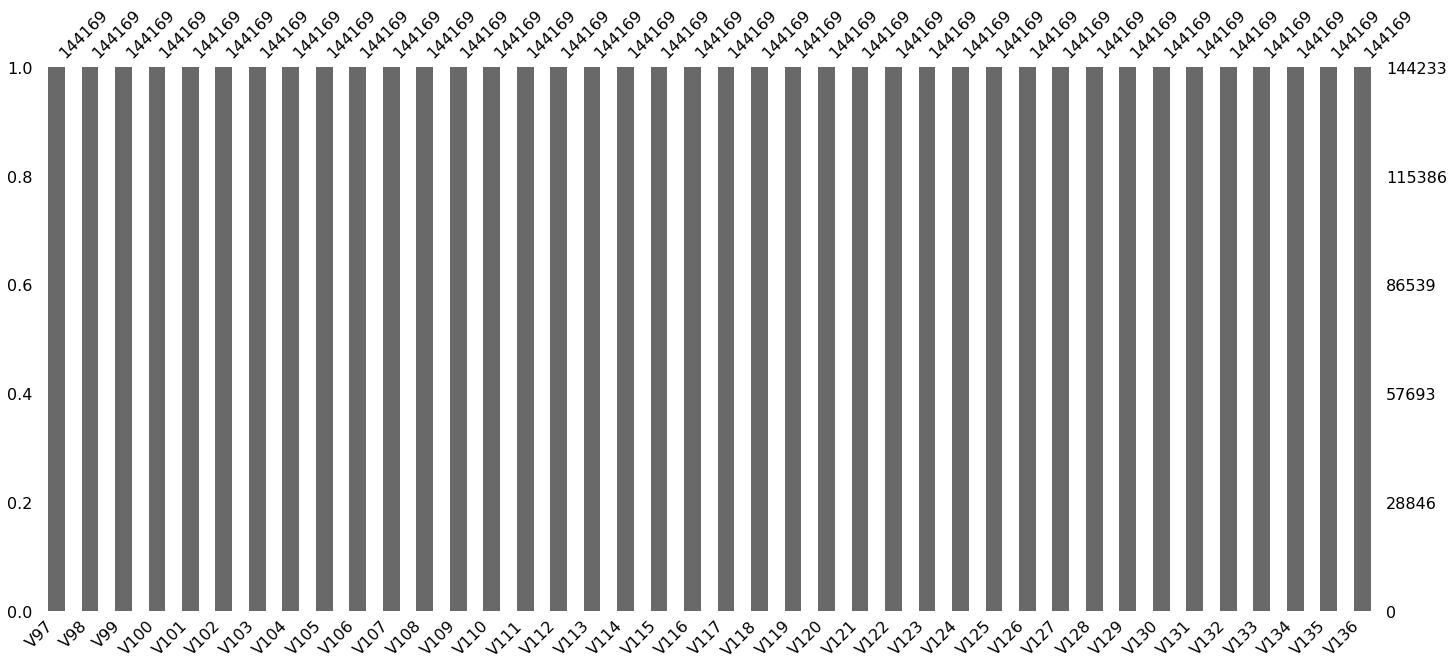

In [532]:
v_03 = df[ft[190:230]]
msno.bar(v_03)

plt.show()

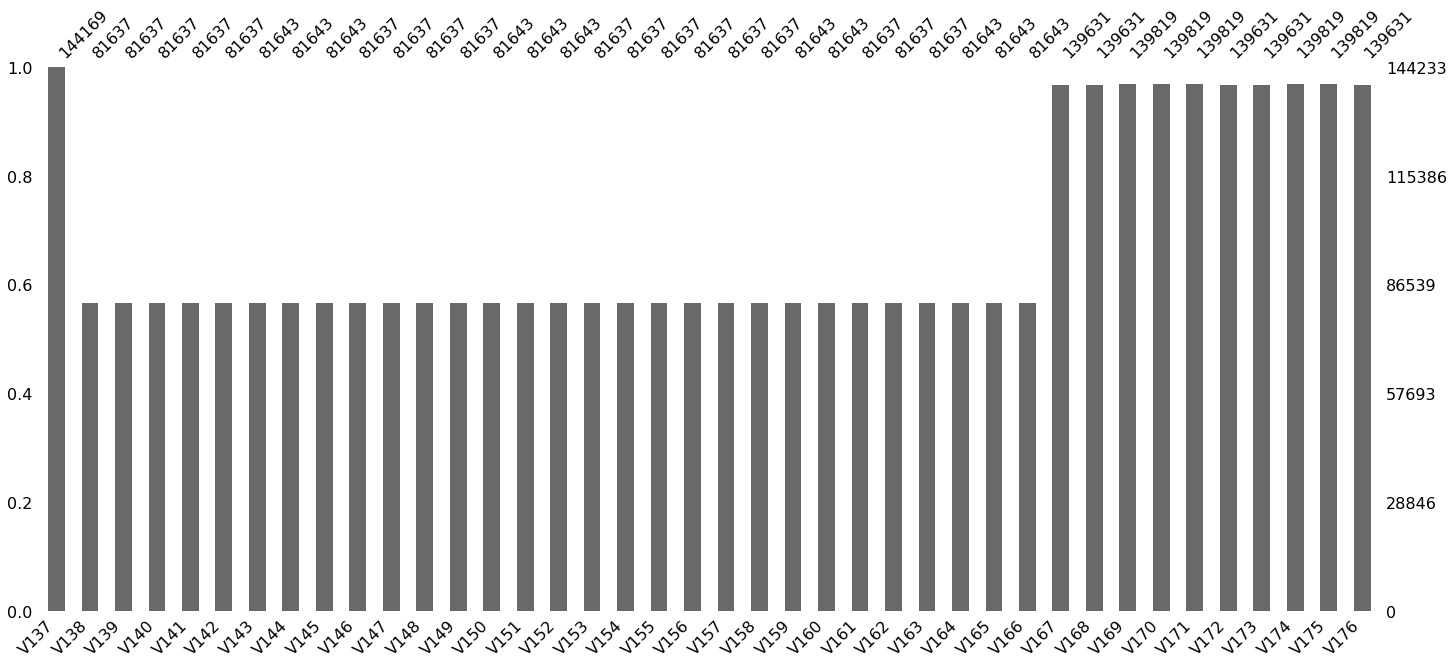

In [533]:
v_04 = df[ft[230:270]]
msno.bar(v_04)

plt.show()

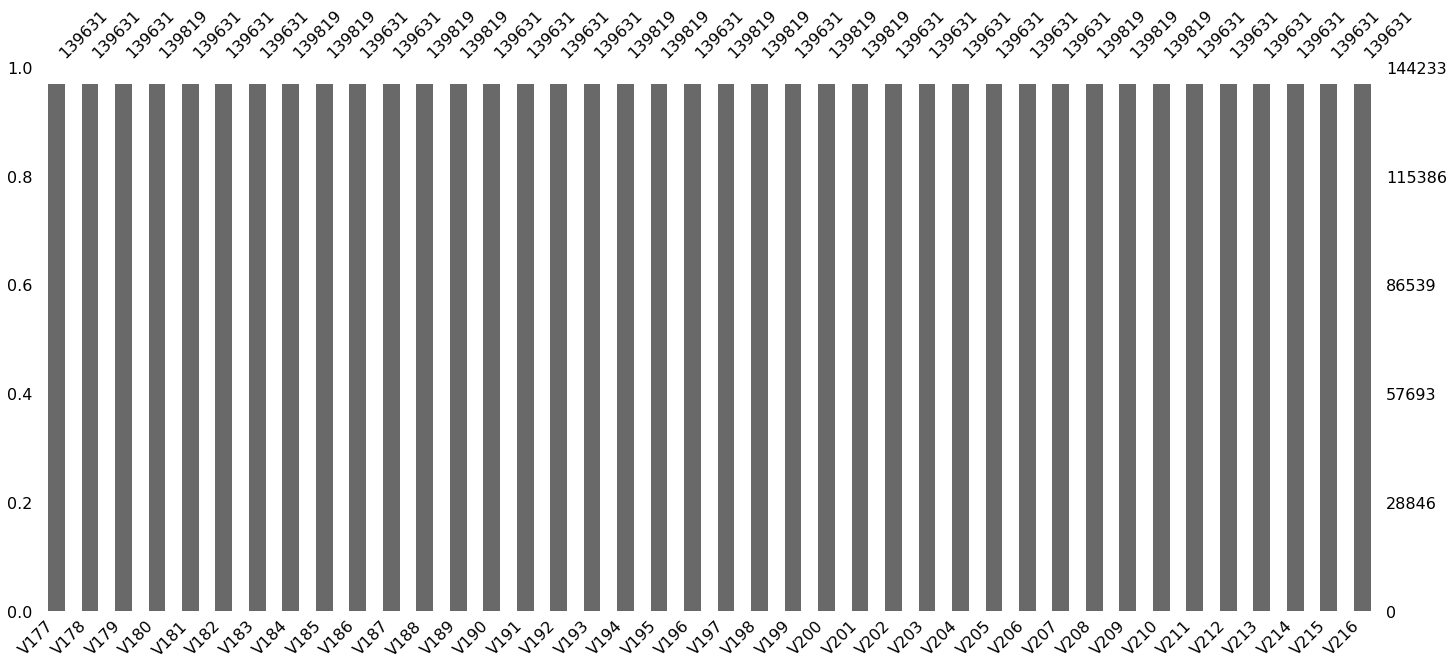

In [534]:
v_05 = df[ft[270:310]]
msno.bar(v_05)

plt.show()

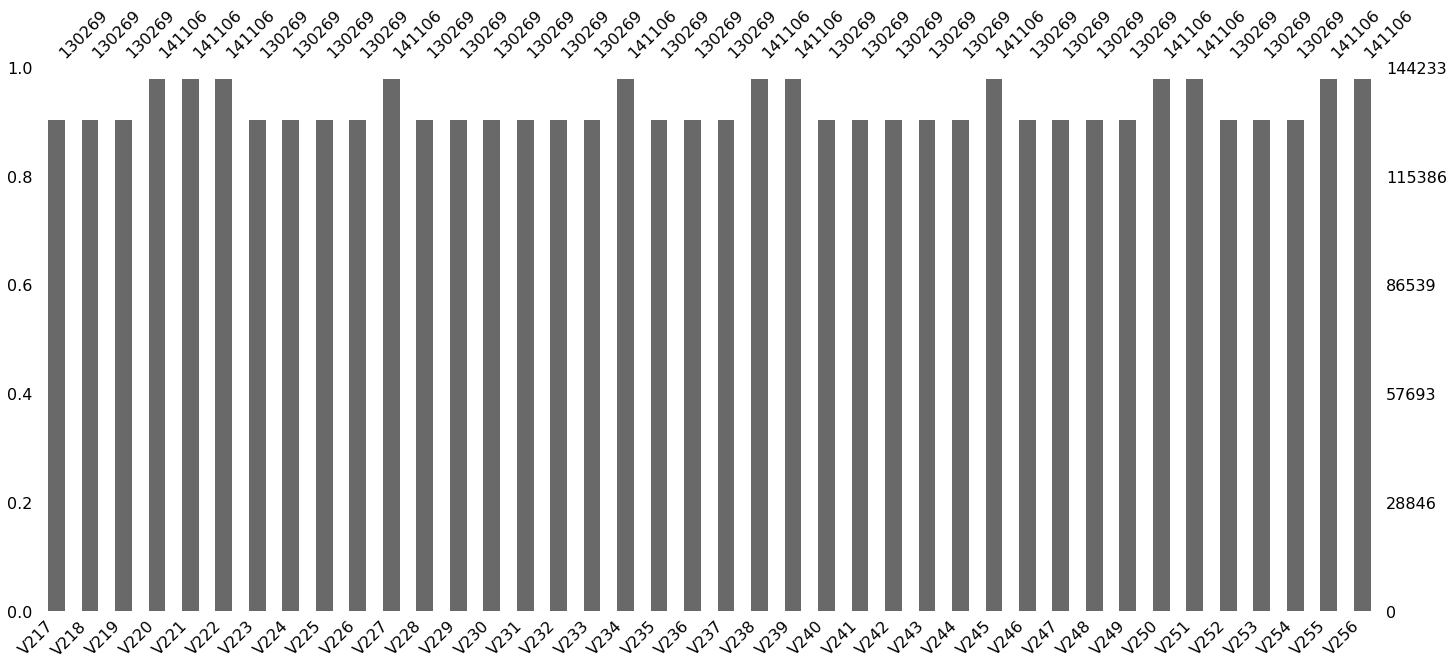

In [535]:
v_06 = df[ft[310:350]]
msno.bar(v_06)

plt.show()

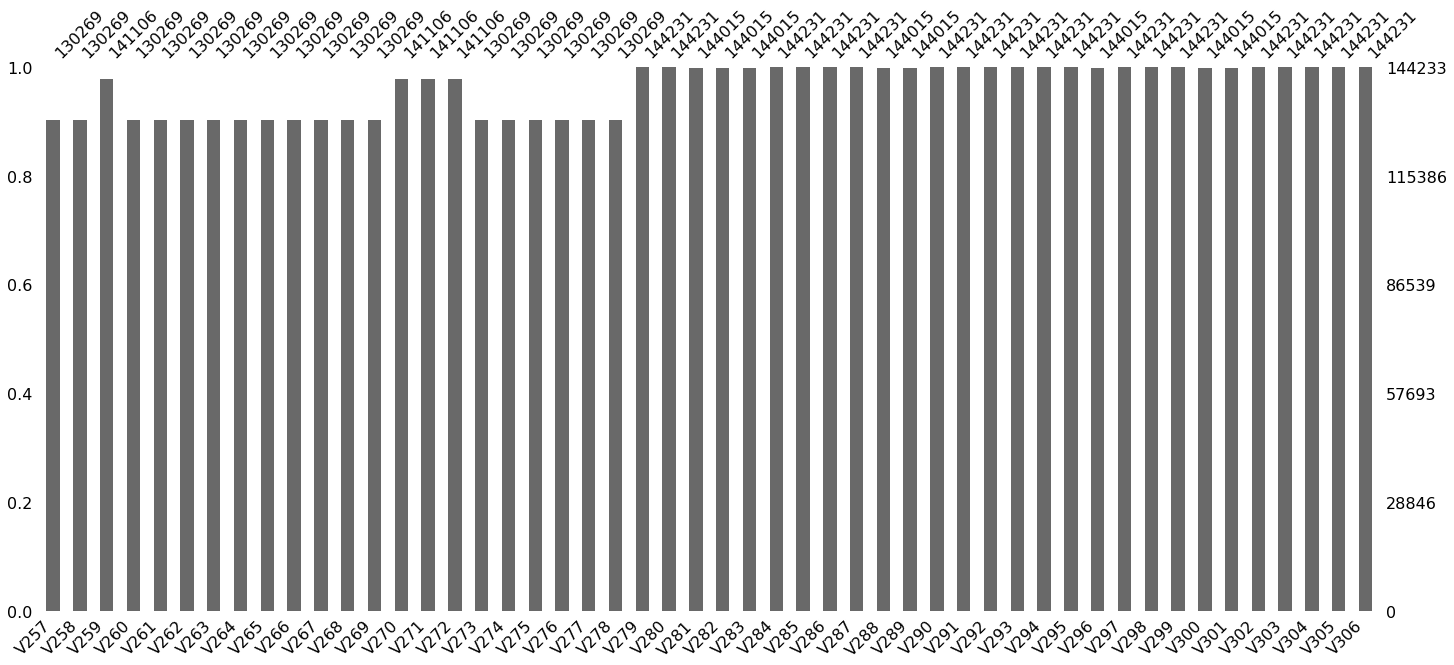

In [536]:
v_07 = df[ft[350:400]]
msno.bar(v_07)

plt.show()

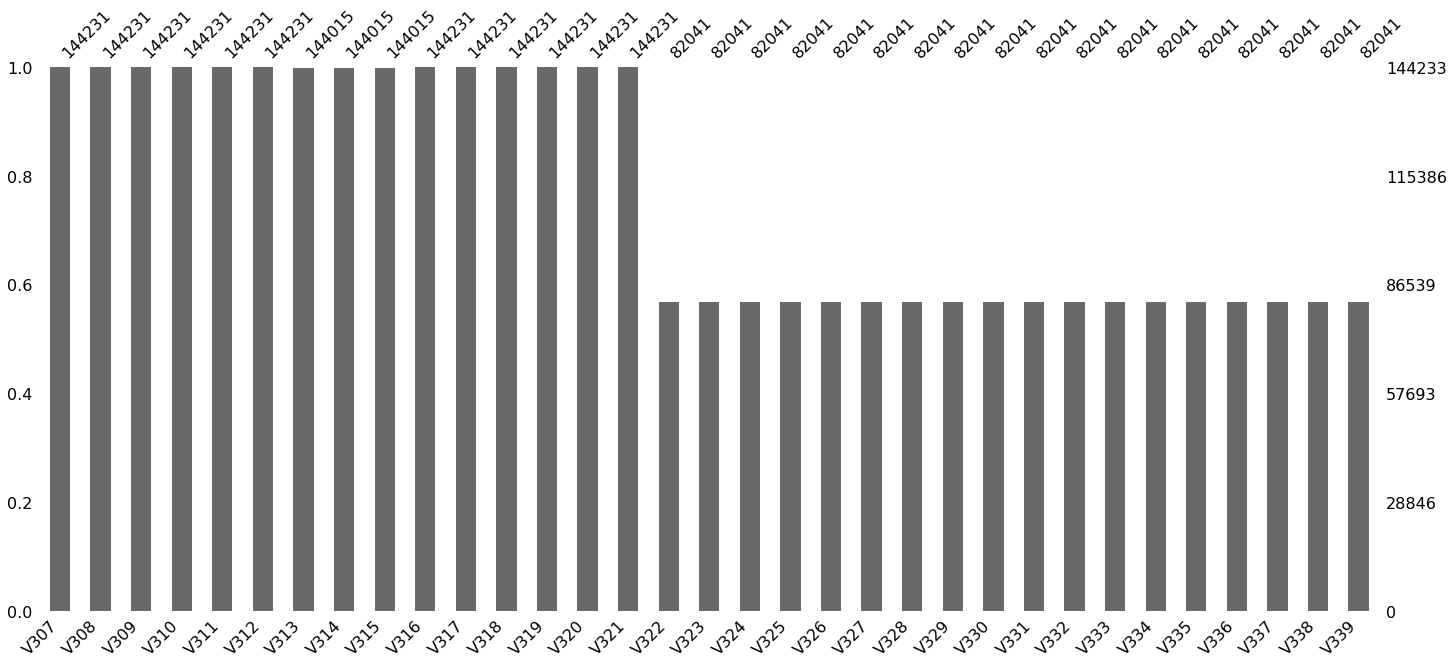

In [537]:
v_08 = df[ft[400:]]
msno.bar(v_08)

plt.show()

- id_1. id_2, card, etc_1, etc_2, c, d, v_01 ~ v_08

In [538]:
# str이 너무 다양하면 안맞음
def seperate_data_type(data,standard):

    binominal = []
    continuous = []

    for i in data.columns:
        if data[i].nunique() < standard:
            binominal.append(i)
        else:
            continuous.append(i)
    print ('binominal_data:', len(binominal), '개')
    print ('binominal_data:', binominal)
    print ('-------------------------------------------------------------------------------')
    #binominal_data = data[binominal]
    print ('continuous_data:', len(continuous), '개')
    print ('continuous_data:', continuous)
    #continuous_data = data[continuous]

In [539]:
seperate_data_type(id_1, 10)

binominal_data: 3 개
binominal_data: ['id_12', 'id_15', 'id_16']
-------------------------------------------------------------------------------
continuous_data: 16 개
continuous_data: ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19']


In [540]:
# id_12는 처리할게없음 15는 조금있고 16은 꽤있음
print (df[['id_12', 'id_15', 'id_16']].isnull().sum())
a = df[['Target', 'id_12', 'id_15', 'id_16']].fillna('Nan')

id_12        0
id_15     3248
id_16    14893
dtype: int64


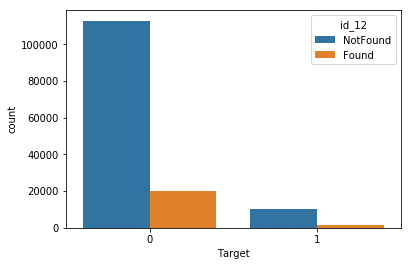

In [541]:
import seaborn as sns

sns.countplot(data = a, x = 'Target', hue = 'id_12')

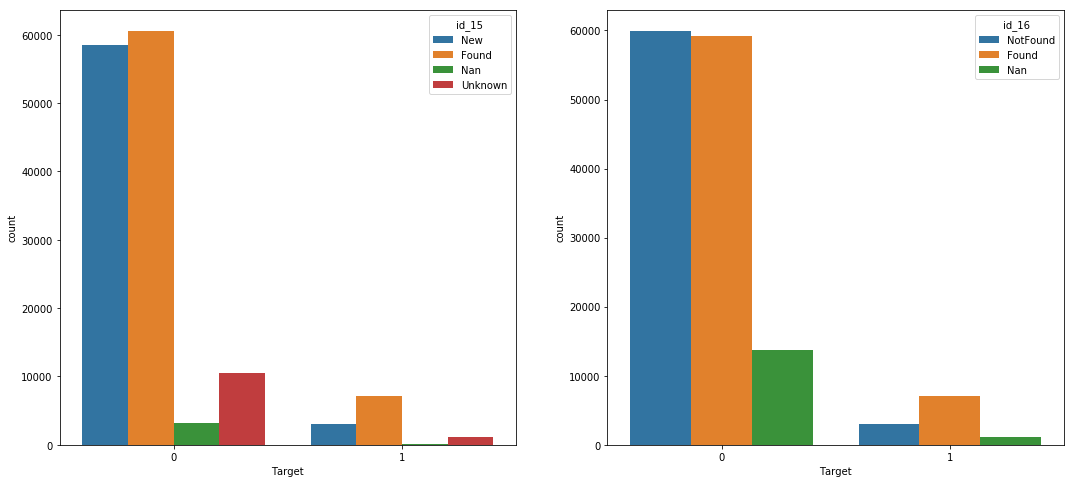

In [542]:
figure, ((ax1), (ax2)) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(18,8)
sns.countplot(data = a, x = 'Target', hue = 'id_15', ax = ax1)
sns.countplot(data = a, x = 'Target', hue = 'id_16', ax = ax2)

In [543]:
#id_15 결측치를 Nan으로 설정하고 unknown도 NaN으로 처리
df['id_15'] = df['id_15'].fillna('Nan')
df['id_15'] = df['id_15'].replace('Unknown','Nan').value_counts()
#id_16 결측치를 Nan으로 설정
df['id_16'] = df['id_16'].fillna('Nan')

In [544]:
#id_07, id_08,결측치 너무 많아 제거
del df['id_07']
del df['id_08']

In [545]:
id_ = df[['Target','id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 
    'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19']]

In [546]:
id_.describe()

,Target,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19
count,144233.000000,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000
mean,0.078470,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174
std,0.268911,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343
min,0.000000,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000
25%,0.000000,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000
50%,0.000000,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000
75%,0.000000,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000
max,1.000000,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000


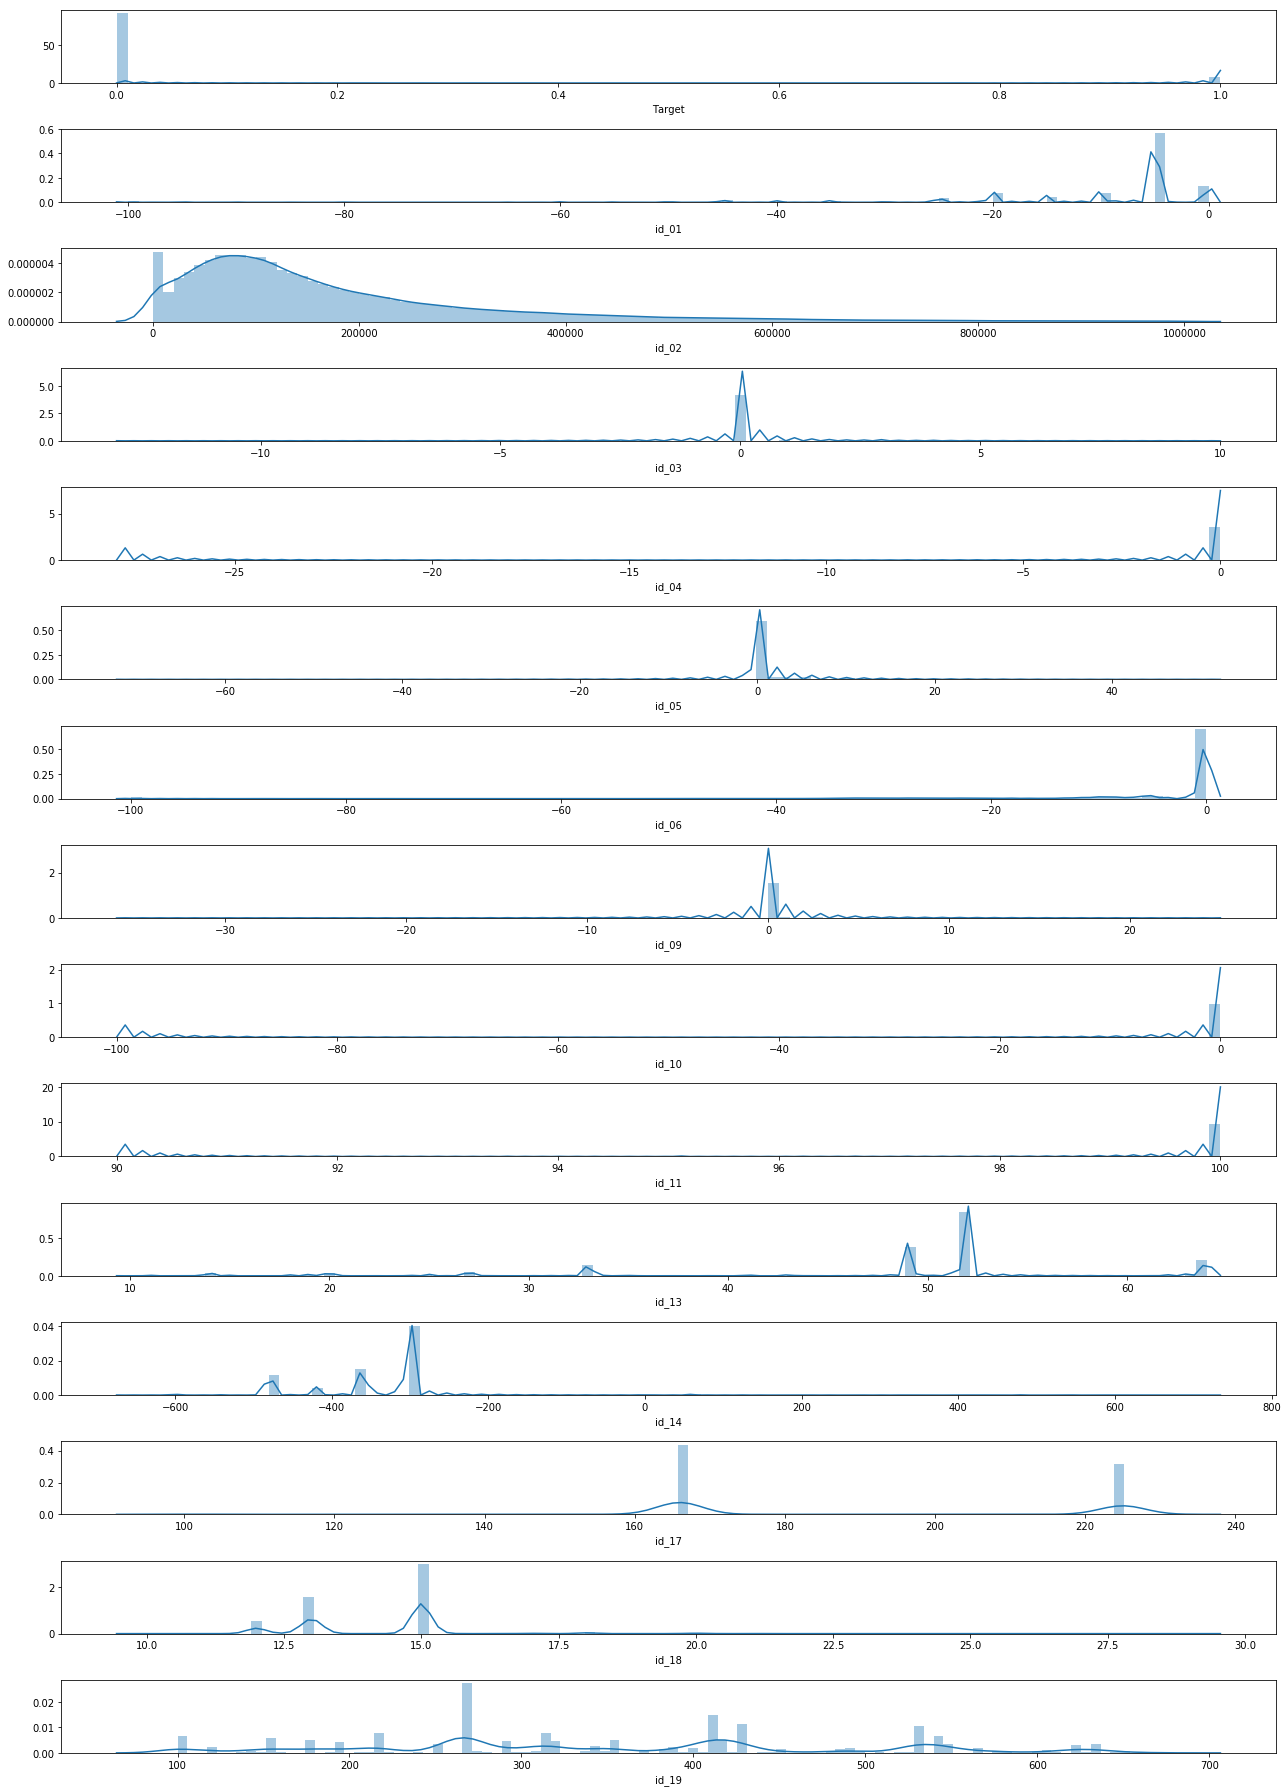

In [547]:
fig,(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15) = plt.subplots(nrows = 15)
fig.set_size_inches(18,25)

len_ = len (id_.columns)
graph_num = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]
for i in range(len_):
    sns.distplot(id_[id_.columns[i]].dropna(), bins = 100, ax = graph_num[i])
plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

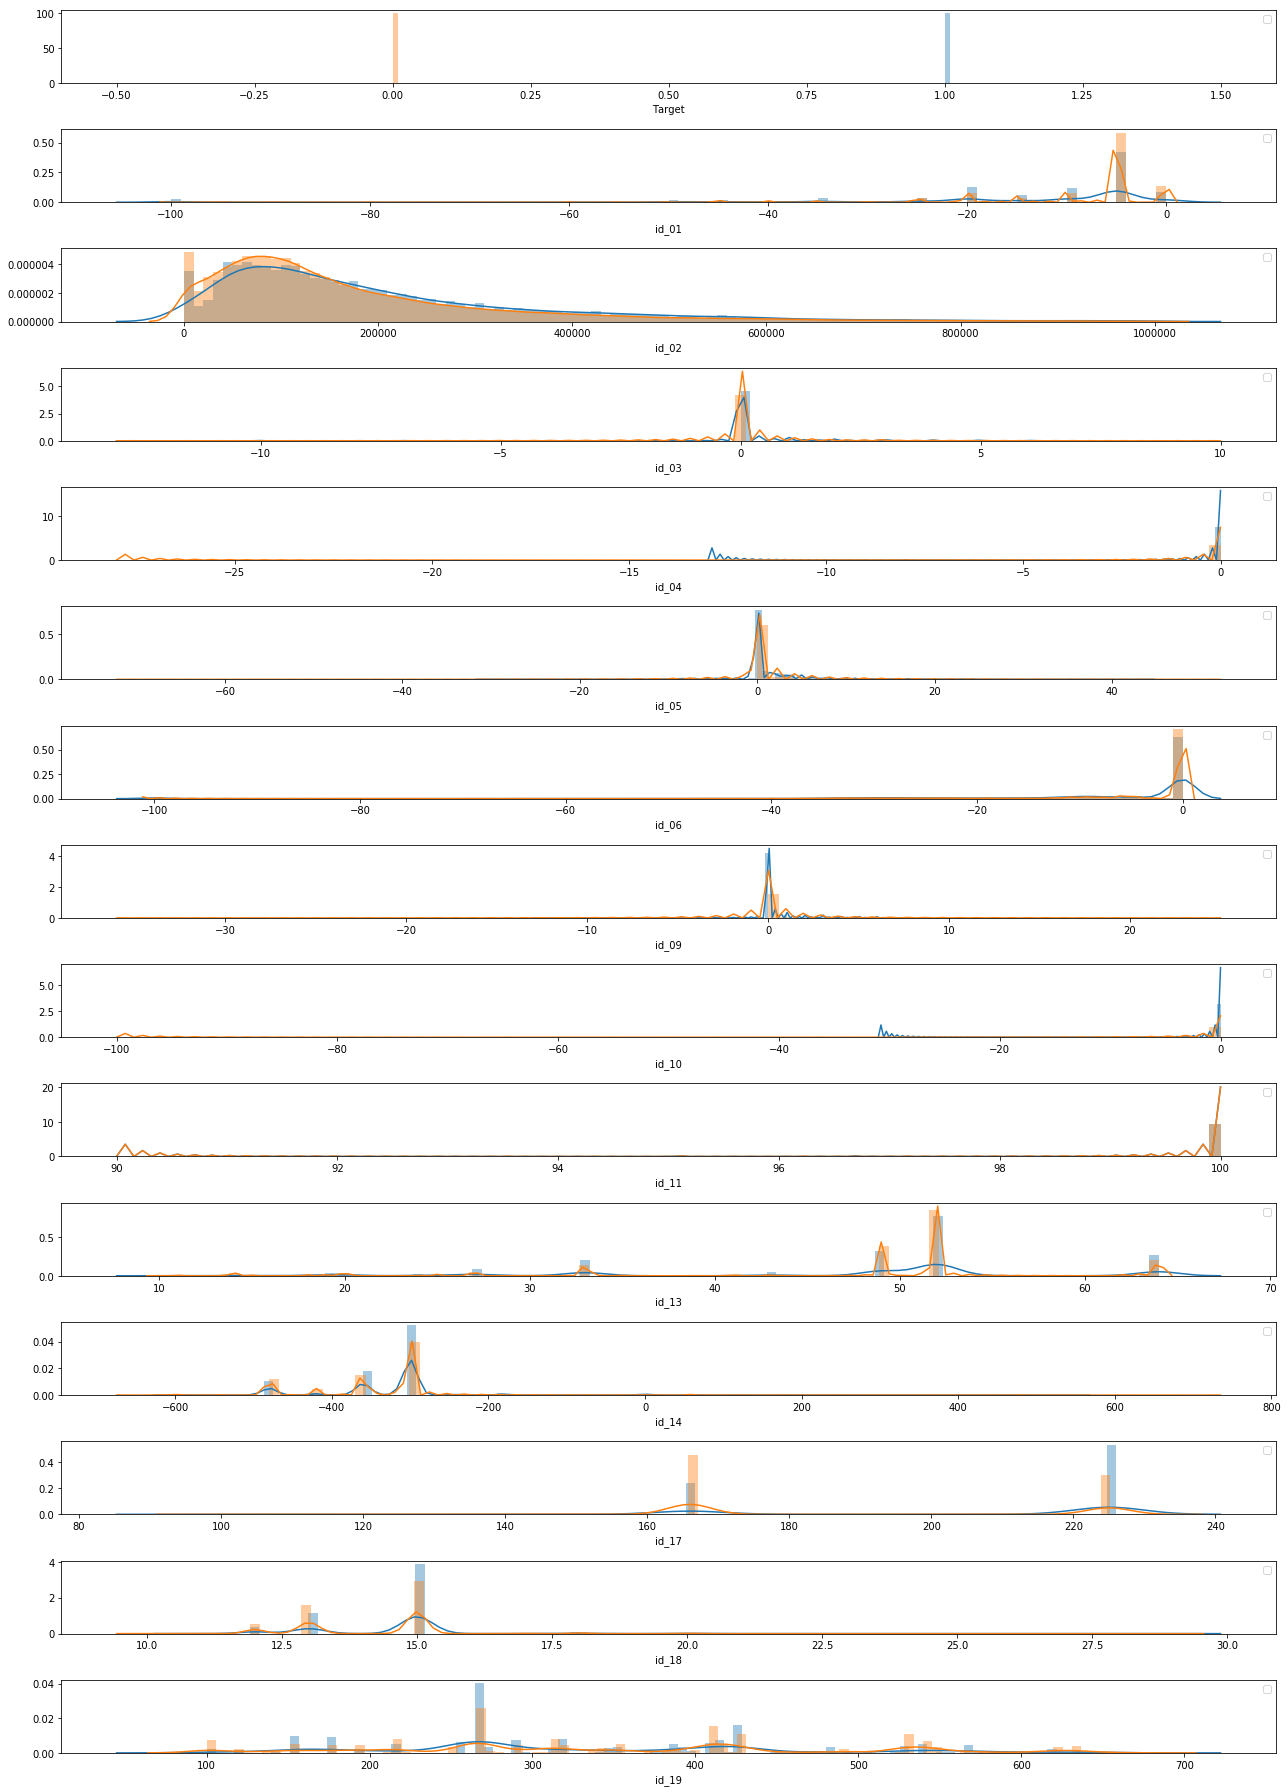

In [548]:
O_Target = id_[id_['Target']==1]
X_Target = id_[id_['Target']==0]

fig,(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14,ax15) = plt.subplots(nrows = 15)
fig.set_size_inches(18,25)

len_ = len (id_.columns)
graph_num = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]
for i in range(len_):
    sns.distplot(O_Target[id_.columns[i]].dropna(), bins = 100, ax = graph_num[i]).legend()
    sns.distplot(X_Target[id_.columns[i]].dropna(), bins = 100, ax = graph_num[i]).legend()
plt.tight_layout()

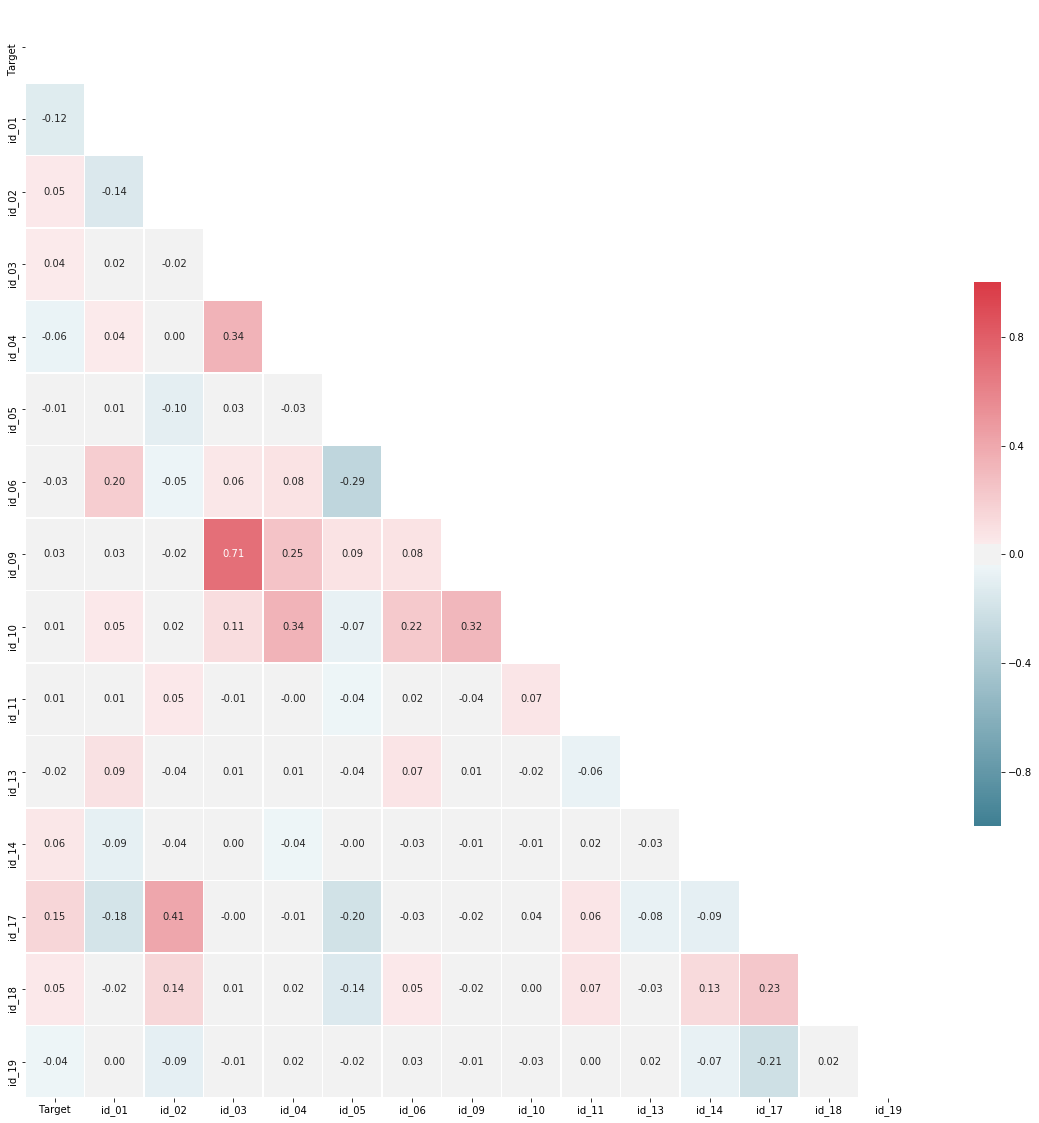

In [549]:
x = id_.corr()
mask = np.zeros_like(x)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize = (20, 20))
sns.heatmap(x, mask=mask,  cmap=cmap, cbar_kws={"shrink": 0.5}, 
            annot=True, annot_kws={"size": 10}, 
            vmax=1, vmin=-1, center=0,  linewidths=.5, fmt='.2f')
plt.show() 

In [550]:
# 의미가 없다
seperate_data_type(id_2, 15)

binominal_data: 11 개
binominal_data: ['id_23', 'id_24', 'id_27', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
-------------------------------------------------------------------------------
continuous_data: 8 개
continuous_data: ['id_20', 'id_21', 'id_22', 'id_25', 'id_26', 'id_30', 'id_31', 'id_33']


In [551]:
b = df[['Target','id_28', 'id_29', 'id_30', 'id_31','id_33', 'id_34', 'id_35','id_36', 'id_37', 'id_38']]
for i in b.columns:
    print (i + " : " + str(b[i].nunique()))

Target : 2
id_28 : 2
id_29 : 2
id_30 : 75
id_31 : 130
id_33 : 260
id_34 : 4
id_35 : 2
id_36 : 2
id_37 : 2
id_38 : 2


In [552]:
b['id_28'] = b['id_28'].fillna('Nan')
b['id_29'] = b['id_29'].fillna('Nan')

In [553]:
b['id_30'] = b['id_30'].apply(str)
b['id_30'] = b['id_30'].str.lower()
b['id_30'] = b['id_30'].fillna('Nan')

In [554]:
b['id_31'].isnull().sum()

3951

In [555]:
b['id_30'].value_counts().head()

nan           66668
windows 10    21155
windows 7     13110
ios 11.2.1     3722
ios 11.1.2     3699
Name: id_30, dtype: int64

In [556]:
# https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt
b.loc[b['id_30'].str.contains('windows'), 'id_30'] = 'pc_windows'
b.loc[b['id_30'].str.contains('ios'), 'id_30'] = 'phone_ios'
b.loc[b['id_30'].str.contains('mac'), 'id_30'] = 'pc_mac'
b.loc[b['id_30'].str.contains('android'), 'id_30'] = 'phone_android'
b.loc[b['id_30'].str.contains('linux'), 'id_30'] = 'pc_linux'
b.loc[b['id_30'].isin(b['id_30'].value_counts()[b['id_30'].value_counts() < 100].index), 'id_30'] = 'etc'

In [557]:
b['id_30'].value_counts()[b['id_30'].value_counts() < 100]

etc    25
Name: id_30, dtype: int64

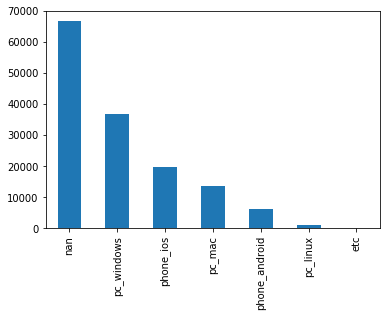

In [558]:
b['id_30'].value_counts().plot(kind = 'bar')

In [559]:
b['id_31'] = b['id_31'].fillna('Nan')
b['id_31'].value_counts().head(20)

chrome 63.0                22000
mobile safari 11.0         13423
mobile safari generic      11474
ie 11.0 for desktop         9030
safari generic              8195
chrome 62.0                 7182
chrome 65.0                 6871
chrome 64.0                 6711
chrome 63.0 for android     5806
chrome generic              4778
chrome 66.0                 4264
edge 16.0                   4188
Nan                         3951
chrome 64.0 for android     3473
chrome 65.0 for android     3336
firefox 57.0                3315
mobile safari 10.0          2779
chrome 66.0 for android     2349
chrome 62.0 for android     2097
edge 15.0                   1600
Name: id_31, dtype: int64

In [560]:
df_train = b
df_train.loc[df_train['id_31'].str.contains('chrome', na=False), 'id_31'] = 'chrome'
df_train.loc[df_train['id_31'].str.contains('firefox', na=False), 'id_31'] = 'firefox'
df_train.loc[df_train['id_31'].str.contains('safari', na=False), 'id_31'] = 'safari'
df_train.loc[df_train['id_31'].str.contains('edge', na=False), 'id_31'] = 'edge'
df_train.loc[df_train['id_31'].str.contains('ie', na=False), 'id_31'] = 'iE'
df_train.loc[df_train['id_31'].str.contains('samsung', na=False), 'id_31'] = 'samsung'
df_train.loc[df_train.id_31.isin(df_train.id_31.value_counts()[df_train.id_31.value_counts() < 500].index), 'id_31'] = "etc"

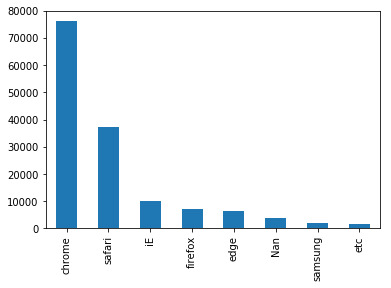

In [561]:
df_train['id_31'].value_counts().plot(kind = 'bar')

In [562]:
# id_33 사진 해상도 인듯

In [563]:
# id_33 뭔지 모르겠음~
b.id_34.value_counts()

match_status:2     60011
match_status:1     17376
match_status:0       415
match_status:-1        3
Name: id_34, dtype: int64

In [564]:
b.id_34.isnull().sum()

66428

In [565]:
b.id_35 = b.id_35.fillna("Nan")
b.id_36 = b.id_36.fillna("Nan")
b.id_37 = b.id_37.fillna("Nan")
b.id_38 = b.id_38.fillna("Nan")

In [566]:
etc_1.DeviceType = etc_1.DeviceType.fillna("Nan")

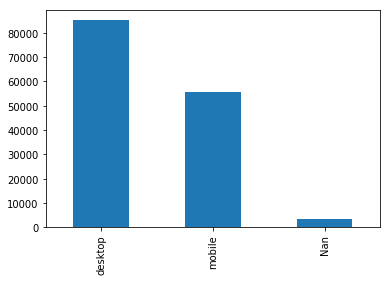

In [567]:
etc_1['DeviceType'].value_counts().plot(kind = 'bar')

In [569]:
etc_1['DeviceInfo'] = etc_1['DeviceInfo'].apply(str)
etc_1['DeviceInfo'] = etc_1['DeviceInfo'].str.lower()

In [572]:
etc_1.loc[etc_1['DeviceInfo'].str.contains('ios device', na=False), 'DeviceInfo'] = 'ios'
etc_1.loc[etc_1['DeviceInfo'].str.contains('macos', na=False), 'DeviceInfo'] = 'macOS'
etc_1.loc[etc_1['DeviceInfo'].str.contains('rv:', na=False), 'DeviceInfo'] = 'rv'
etc_1.loc[etc_1['DeviceInfo'].str.contains('sm-', na=False), 'DeviceInfo'] = 'sm'
etc_1.loc[etc_1['DeviceInfo'].str.contains('samsung', na=False), 'DeviceInfo'] = 'sm'

In [574]:
etc_1.loc[(etc_1.DeviceInfo != 'windows') & (etc_1.DeviceInfo != 'ios') & (etc_1.DeviceInfo != 'macOS') &
          (etc_1.DeviceInfo != 'rv') & (etc_1.DeviceInfo != 'sm') &  & (etc_1.DeviceInfo != 'nan')
          (etc_1.DeviceInfo != 'trident/7.0') & (etc_1.DeviceInfo != 'rv'), 'DeviceInfo'] = 'etc'  

In [575]:
etc_1.DeviceInfo.value_counts()

windows        47722
etc            40391
ios            19782
macOS          12573
sm             11940
trident/7.0     7440
rv              4385
Name: DeviceInfo, dtype: int64

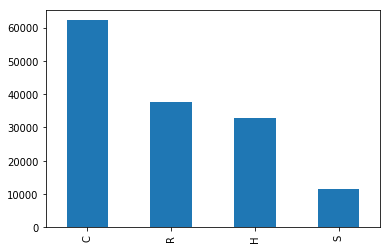

In [583]:
etc_1.ProductCD.value_counts().plot(kind = 'bar')

In [598]:
etc_2.head()

,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
TransactionID,,,,,,
2987004,420.0,87.0,NaN,NaN,gmail.com,NaN
2987008,337.0,87.0,NaN,NaN,anonymous.com,NaN
2987010,NaN,NaN,NaN,NaN,gmail.com,gmail.com
2987011,NaN,NaN,NaN,30.0,hotmail.com,hotmail.com
2987016,170.0,87.0,NaN,NaN,aol.com,NaN


In [590]:
etc_2[['addr1','addr2']].corr()

,addr1,addr2
addr1,1.000000,0.000601
addr2,0.000601,1.000000


In [599]:
#  dist1	dist2	P_emaildomain	R_emaildomain 삭제

In [601]:
for i in c.columns:
    print (i + " : " + str(c[i].nunique()))

C1 : 1559
C2 : 1182
C3 : 27
C4 : 1202
C5 : 1
C6 : 1194
C7 : 1036
C8 : 1236
C9 : 1
C10 : 1211
C11 : 1354
C12 : 1126
C13 : 1362
C14 : 994


In [604]:
c.describe()
# 뭘 어떻게 해야되노

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,144233.000000,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.0,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000
mean,27.793681,34.344533,0.023032,15.603558,0.0,15.583036,10.512830,19.395173,0.0,19.787483,20.359425,14.811687,20.517850,10.499685
std,249.745336,291.306999,0.303819,131.944756,0.0,132.514335,117.037122,181.039192,0.0,181.760988,176.778700,164.194903,165.660021,87.186134
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,0.0,1.000000,1.000000,2.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000
max,4685.000000,5691.000000,26.000000,2253.000000,0.0,2253.000000,2255.000000,3331.000000,0.0,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [618]:
seperate_data_type(c, 10)

binominal_data: 2 개
binominal_data: ['C5', 'C9']
-------------------------------------------------------------------------------
continuous_data: 12 개
continuous_data: ['C1', 'C2', 'C3', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14']


In [622]:
#df[['Target','C5', 'C9']]

0.0    144233
Name: C5, dtype: int64

In [616]:
seperate_data_type(d, 15)

binominal_data: 1 개
binominal_data: ['D11']
-------------------------------------------------------------------------------
continuous_data: 14 개
continuous_data: ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D12', 'D13', 'D14', 'D15']
